## Offline analysis

here we will explore

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import os
plt.style.use('science')

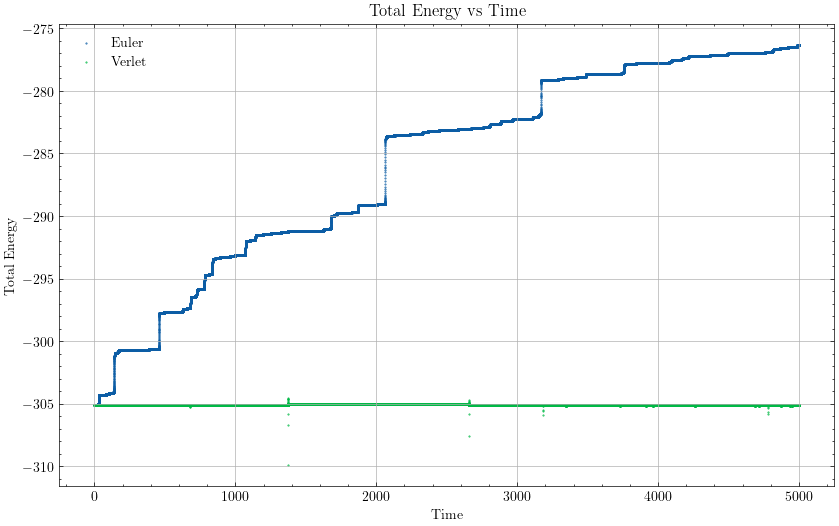

In [13]:
filenameEuler="../data/CPUSequential/energy_N128_Euler.txt"
filenameVerlet="../data/CPUSequential/energy_N128_Verlet.txt"

dataEuler = np.loadtxt(filenameEuler)
time = dataEuler[:,0]
energy = dataEuler[:,3]
kinetic = dataEuler[:,1]
potential = dataEuler[:,2]

dataVerlet = np.loadtxt(filenameVerlet)
energyVerlet = dataVerlet[:,3]

plt.figure(figsize=(10,6))
plt.scatter(time, energy, marker='.', s=0.8, label='Euler')
plt.scatter(time, energyVerlet, marker='.', s=0.8, label='Verlet')
plt.xlabel("Time")
plt.ylabel("Total Energy")
plt.title("Total Energy vs Time")
plt.grid()
plt.legend()
plt.show()

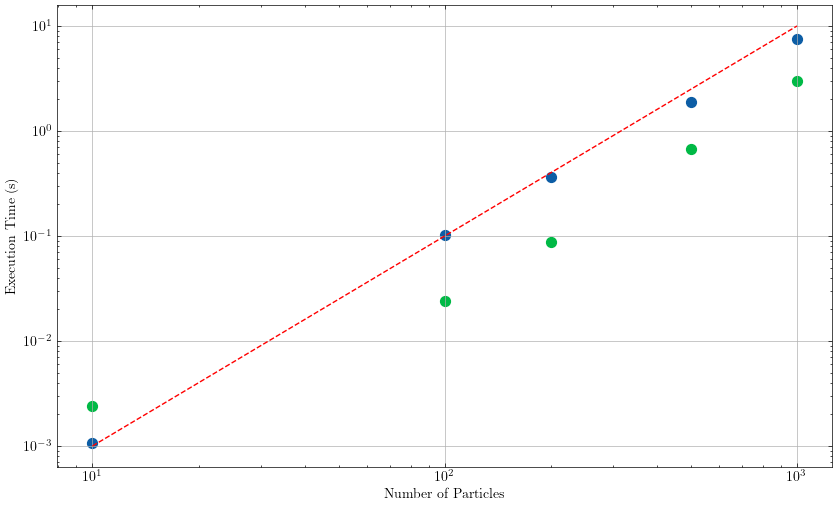

In [3]:
filenameSequential = "../data/CPUSequential/time.dat"
filenameMPI = "../data/CPUParallel/time.dat"
repetitions = 10

nParticlesSequential = []
timeSequential = []
nParticlesMP = []
timeMP = []

with open(filenameSequential, 'r') as file:
    lines = file.readlines()

for i in range(0, len(lines), repetitions):
    chunk = lines[i:i + repetitions]
    particles_chunk = []
    times_chunk = []
    for line in chunk:
        parts = line.strip().split()
        particles_chunk.append(int(parts[0]))
        times_chunk.append(float(parts[-1]))
    nParticlesSequential.append(particles_chunk[0])
    # Select the minimum time from the repetitions
    timeSequential.append(np.min(times_chunk))

with open(filenameMPI, 'r') as file:
    lines = file.readlines()
for i in range(0, len(lines), repetitions):
    chunk = lines[i:i + repetitions]
    particles_chunk = []
    times_chunk = []
    for line in chunk:
        parts = line.strip().split()
        particles_chunk.append(int(parts[0]))
        times_chunk.append(float(parts[-1]))
    nParticlesMP.append(particles_chunk[0])
    # Select the minimum time from the repetitions
    timeMP.append(np.min(times_chunk))

# Plot them
plt.figure(figsize=(10,6))
plt.scatter(nParticlesSequential, timeSequential, marker='.', s=200)
plt.scatter(nParticlesMP, timeMP, marker='.', s=200)
plt.xlabel("Number of Particles")
plt.ylabel("Execution Time (s)")
#reference line
x = np.linspace(np.min(nParticlesSequential), np.max(nParticlesSequential), 100)
ref_time = 1e-5*x**2
plt.plot(x, ref_time,  color='red', linestyle='--')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.show()